**OpenCV**

OpenCV ist eine freie Programmbibliothek mit Algorithmen für die Bildverarbeitung und Computer Vision.
Sie ist für die Programmiersprachen C, C++, Python und Java geschrieben und steht als freie Software unter den Bedingungen der Apache 2 License. OpenCV wurde von Intel entwickelt.
Die Bibliothek umfasst unter anderem Algorithmen für Gesichtserkennung, 3D-Funktionalität, Haar-Klassifikatoren, verschiedene sehr schnelle Filter (z. B. Sobel, Canny, Gauß) und Funktionen für die Kamerakalibrierung.
https://opencv.org/

Installation
Opencv muss zuerst installiert werden:

In [3]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   - -------------------------------------- 1.3/38.8 MB 8.4 MB/s eta 0:00:05
   ----- ---------------------------------- 5.2/38.8 MB 13.3 MB/s eta 0:00:03
   ------------ --------------------------- 12.6/38.8 MB 21.9 MB/s eta 0:00:02
   ---------------------- ----------------- 21.5/38.8 MB 27.7 MB/s eta 0:00:01
   -------------------------------- ------- 31.5/38.8 MB 32.2 MB/s eta 0:00:01
   ---------------------------------------  38.8/38.8 MB 34.7 MB/s eta 0:00:01
   ---------------------------------------- 38.8/38.8 MB 32.1 MB/s eta 0:00:00


OpenCV importieren
Opencv und einige weiteren Pakete importieren:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

Bild laden
Wir laden ein Bild:

In [80]:
img = cv2.imread('./content/bird.jpg')
img # Bildinhalt als numpy array

array([[[140, 178, 156],
        [140, 178, 156],
        [140, 179, 154],
        ...,
        [  6, 157, 237],
        [  2, 155, 234],
        [  0, 153, 232]],

       [[141, 178, 158],
        [140, 179, 157],
        [141, 179, 157],
        ...,
        [  5, 156, 236],
        [  2, 153, 233],
        [  0, 152, 231]],

       [[142, 180, 162],
        [140, 181, 160],
        [142, 181, 160],
        ...,
        [  5, 156, 236],
        [  2, 153, 233],
        [  0, 151, 231]],

       ...,

       [[ 87, 110, 156],
        [ 87, 110, 156],
        [ 89, 109, 156],
        ...,
        [254, 254, 254],
        [255, 253, 255],
        [255, 253, 255]],

       [[ 87, 110, 156],
        [ 87, 110, 156],
        [ 89, 109, 156],
        ...,
        [252, 254, 255],
        [255, 252, 255],
        [255, 252, 255]],

       [[ 87, 110, 156],
        [ 87, 110, 156],
        [ 89, 109, 156],
        ...,
        [252, 254, 255],
        [255, 252, 255],
        [255, 252, 255]]

Jeder Bildpunkt (pixel) besteht aus 3 Farbwerten zwischen 0 und 255. So speichert Python Informationen zu jedem Bildpunkt und somit geht es effizient mit Speicherplatz um.

Wenn z.B. Informationen zu einem gewissen Bildpunkt im Fokust stehen:

In [81]:
img[0][0] # erster punkt: erste zeile, erste spalte

array([140, 178, 156], dtype=uint8)

In [82]:
img.shape # 451 x 640 pixel und 3 Farbkanäle

(451, 640, 3)

Bild in Jupyter Notebook anzeigen.

(*cv2.imshow() - wird nicht empfohlen, da JN daran crasht*)


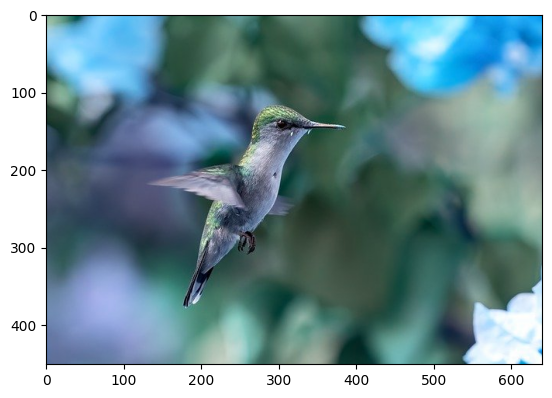

In [83]:
plt.imshow(img)
plt.show()

Farbfehler!

Das Bild wird angezeigt allerdings mit geänderten Farben. Das liegt daran, dass opencv anstatt RGB, die Farben in einer umgekehrten Reihenfolge (BGR) darstellt. Matplotlib dagegen kennt die Reihenfolge RGB und deshalb sehen die Farben "falsch" aus. Wir können natürlich diesen Fehler korrigieren, indem wir das Bild-Array (img) reversen.

[156 178 140]


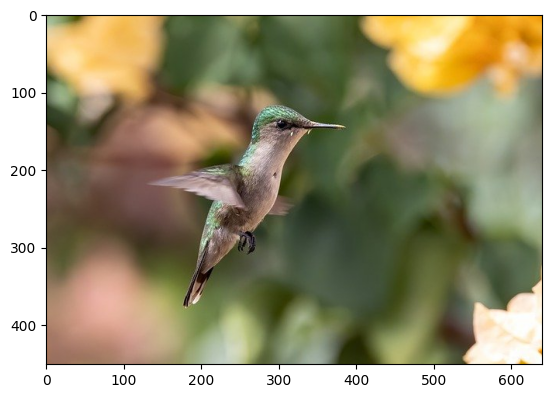

In [84]:
img_bgr = img[:,:,::-1]
print(img_bgr[0,0])
plt.imshow(img_bgr)
plt.show()

Alternativ kann die folgende Funktion aus opencv-Bibliothek eingesetzt werden:

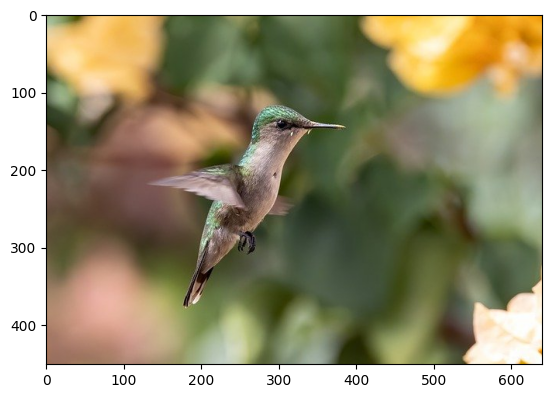

In [85]:
img_rev = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img_rev)
plt.show()

Damit wir den Unterschied zwischen Original und Reverse sehen:

In [86]:
img[0][0]

array([140, 178, 156], dtype=uint8)

In [87]:
img_bgr[0][0]

array([156, 178, 140], dtype=uint8)

uint8: unsigned integer in 8 bits- ein Zahlenformat für einen effizienten Umgang mit Speicher. Wobei in einem solchen Array jeweils Zahlen zwischen 0 und 255 erlaubt sind.

Wir haben die Möglichkeit, unser Bild in Graustufen zu konvertieren:

(451, 640)


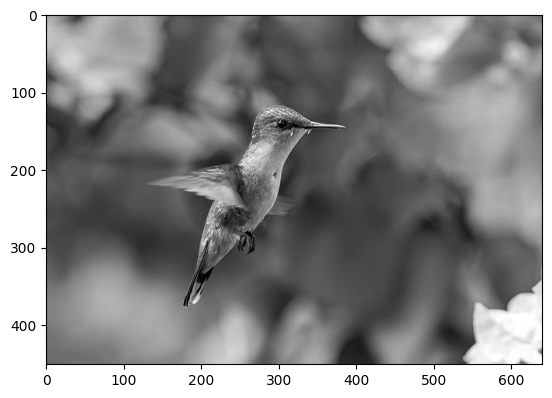

In [88]:
# Grauwert = 0.2989 * R + 0.5870 * G + 0.1140 * B
img_grau_manuell = img[:,:,0] * 0.2989 + img[:,:,1] * 0.5870 + img[:,:,1] * 0.1140
plt.imshow(img_grau_manuell, 'gray')
print(img_grau_manuell.shape)

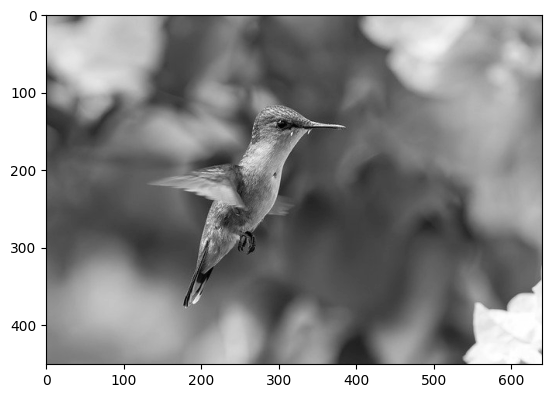

In [89]:
img_grau_cv = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_grau_cv, 'gray') # gray, damit das Bild in Graustufen angezeigt wird, ansosten Gelb-Grün_Blau-Töne
plt.show()

Der shape zeigt, dass wir jetzt eine Dimension weniger haben:

In [90]:
img_grau_cv.shape

(451, 640)

In [91]:
img_grau_cv[0][0] # nur eine Zahl = Graustufe

np.uint8(167)

Helligkeit erhöhen

Um die Helligkeit des Bildes zu erhöhen erstellen wir zunächst ein neues Array mit identischen Dimensionen von unserem Originalbild. Elemente dieses Arrays stellen eine feste Zahl dar, auf die die Bildshelligkeit erhöht werden möchte.

In [108]:
bright_img = img_rev.copy() +30 

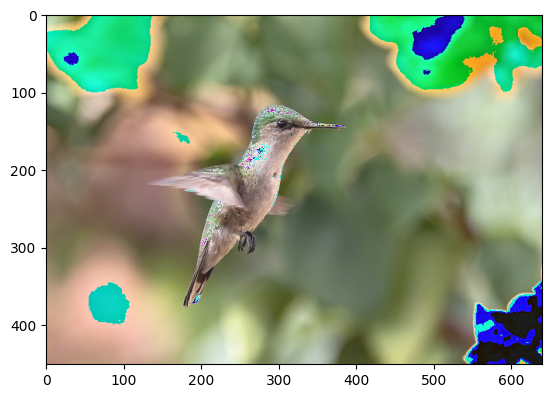

In [109]:
plt.imshow(bright_img)
plt.show() # aufgehellt

Wir benutzen `np.clip()` um Werte zwischen 0 und 255 (die passen jeweils in 1 Byte) zu erzeugen. Wir müssen dennoch den Datentyp von `uint8` umwandeln da die Addition vor der Korrektur von `np.clip()` ausgeführt wird. Dabei kann es zum Überlauf der Farbwerte kommen die sich so auswirken wie oben.

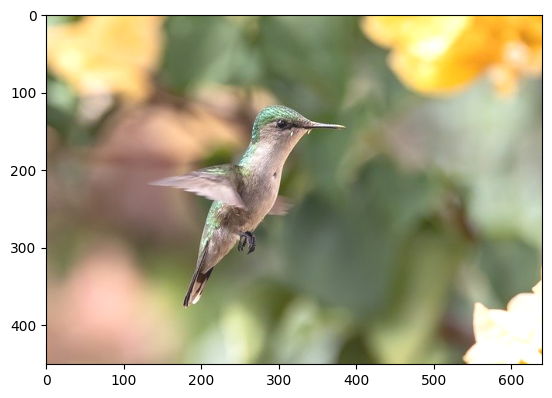

In [95]:
imag_bunt_aufgehellt = img_rev.copy()
imag_bunt_aufgehellt = imag_bunt_aufgehellt.astype(np.float32)

# Erhöhe die Helligkeit
imag_bunt_aufgehellt = np.clip(imag_bunt_aufgehellt + 30, 0, 255)

# Konvertiere zurück zu uint8
imag_bunt_aufgehellt = imag_bunt_aufgehellt.astype(np.uint8)

plt.imshow(imag_bunt_aufgehellt)
plt.show()

Geht auch beim grauen Bild:

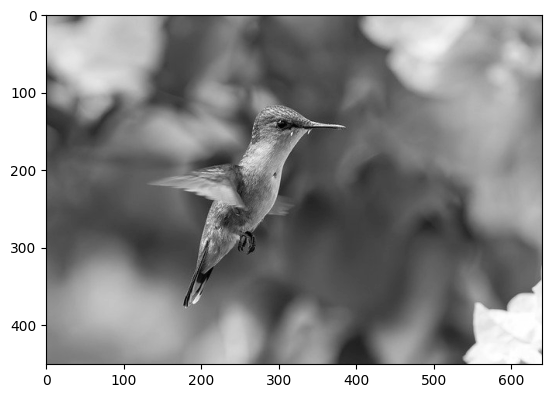

In [96]:
imag_grau_aufgehellt = img_grau_cv.copy()
#imag_grau_aufgehellt = np.clip( imag_grau_aufgehellt + 30,0, 255)
imag_grau_aufgehellt = imag_grau_aufgehellt.astype(np.float32)

# Erhöhe die Helligkeit
aufgehelltes_bild = np.clip(imag_grau_aufgehellt + 30, 0, 255)

# Konvertiere zurück zu uint8
aufgehelltes_bild = aufgehelltes_bild.astype(np.uint8)
plt.imshow(imag_grau_aufgehellt, 'gray')
plt.show()

Ein Kästchen ums "Bird" zeichnen  
Opencv stellt uns dazu eine Funktion zur Verfügung:

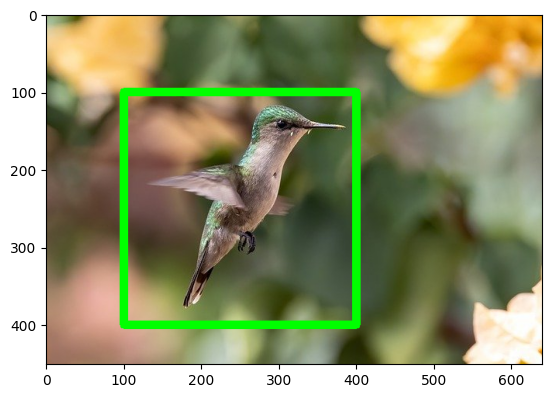

In [97]:
# cv2.rectangle(bildarray, position als zwei tuples, farbe als tuple aus 3 
# zahlen zw. 0 und 255, breite, stärke )
select = img_rev.copy()
cv2.rectangle(select, (100,100),(400,400), (0,255,0),10)
plt.imshow(select)
plt.show()

Gesichtserkennung mit opencv  
Dazu gibt es in opencv bereits vortrainierte Modells, die Gesichter im Bild automatisch erkennen. Dazu ein Bild auswählen, in Graustufen umwandeln und dann einen Klassifizierer einsetzen.  
Ein Klassifizierer (Klassifikationsmodell) funktioniert so: wir zeigen dem Modell möglichst viele Gesichter, sodass unser Modell Gesichtszüge und -formen lernt und wenn das Model bereits fertig trainiert ist, kann es neue Bilder zum sehen bekommen und in diesen Bildern Gesichter wieder erkennen, auch wenn neue Gesichter, die das Model vorher nicht gesehen hat!  
Zum Glück gibt es in opencv Bibliothek bereits trainierte Models, die wir dazu einfach anwenden können. Wir müssen nicht diese erneut trainieren.

In [5]:
# ein Bild mit mindestens einem Gesicht
img = cv2.imread('./content/monalisa.jpg')

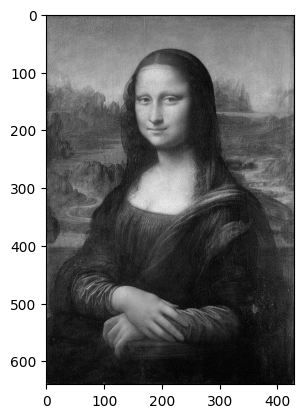

In [6]:
img_grau = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_grau, 'gray')
plt.show()

In [7]:
# Klassifizier laden
kl = cv2.CascadeClassifier('./content/haarcascade_frontalface_alt2.xml')

Für detaillierte Informationen zu Cascade Klassifizierer siehe [hier](https://docs.opencv.org/3.4/dc/d88/tutorial_traincascade.html) und [hier](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf)

In [8]:
# eine Methode, die Gesichter in unterschiedlichen Größen erkennt
gesichter = kl.detectMultiScale(img_grau)

In [9]:
gesichter # Koordinaten: x, y, Weite und Breite des Gesichtes

array([[136, 105, 112, 112]], dtype=int32)

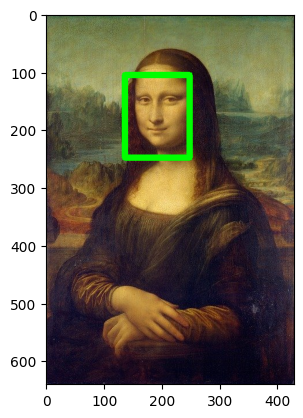

In [10]:
# Original-Bild laden
img = cv2.imread('./content/monalisa.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
# eine Kopie vom Original-Bild
cop = img.copy()

# falls wir mehrere Gesichter im Bild haben:
for gesicht in gesichter:
  x, y, w, b = gesicht # array entpacken
  cv2.rectangle(cop, (x,y),(x+w,x+b), (0,255,0),10)
plt.imshow(cop)
plt.show()

Noch weitere Details erkennen

Opencv stellt uns noch weitere trainierte Models zur Erkennung von mehr Details in Bildern zur Verfügung. Manche Modells können z.B. Gesichtselemente wie Augen oder Mund im Bild erkennen. Manche Models sind in der Lage, Lächeln zu erkennen.

Aufgabe: Nehmt gemeinsam ein Foto mit mehreren Gesichtern von Euch auf und versucht, mit Hilfe von Opencv Gesichter, Augen und Lächeln im Bild markiert zu bekommen.

In [1]:
import cv2
import matplotlib.pyplot as plt


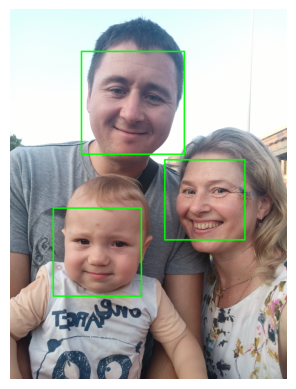

In [9]:

# Завантажуємо зображення
img_1 = cv2.imread(r"C:\Users\OlhaIshchenko\Documents\Daten_Analyse\unterricht\projekt\20241025_projekt_gesichtserkennung\projekt_gesichtserkennung\content\family.jpg")

# Перетворюємо зображення в сірий формат
img_grau_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)

# Завантажуємо класифікатор для розпізнавання облич
kl = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')

if kl.empty():
    print("Fehler: Klassifizierer nicht gefunden")
else:
    # Використовуємо класифікатор для пошуку облич на зображенні
    gesichter = kl.detectMultiScale(img_grau, scaleFactor=1.1, minNeighbors=4, minSize=(20, 20))

    # Робимо копію зображення для малювання
    cop = img.copy()

    # Проходимо через знайдені обличчя і малюємо прямокутники
    for (x, y, w, h) in gesichter:
        cv2.rectangle(cop, (x, y), (x+w, y+h), (0, 255, 0), 20)

    # Відображаємо результат
    plt.imshow(cv2.cvtColor(cop, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


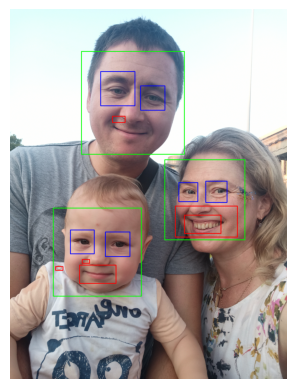

In [4]:
# Завантажуємо зображення
img = cv2.imread(r"C:\Users\OlhaIshchenko\Documents\Daten_Analyse\unterricht\projekt\20241025_projekt_gesichtserkennung\projekt_gesichtserkennung\content\family.jpg")

# Перетворюємо зображення в сірий формат
img_grau = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Завантажуємо каскадні класифікатори для облич, очей та усмішок
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

# Перевірка, чи всі класифікатори завантажилися правильно
if face_cascade.empty() or eye_cascade.empty() or smile_cascade.empty():
    print("Fehler: Einer oder mehrere Klassifizierer nicht gefunden")
else:
    # Використовуємо класифікатор для пошуку облич на зображенні
    faces = face_cascade.detectMultiScale(img_grau, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Робимо копію зображення для малювання
    cop = img.copy()

    # Проходимо через знайдені обличчя і малюємо прямокутники
    for (x, y, w, h) in faces:
        cv2.rectangle(cop, (x, y), (x+w, y+h), (0, 255, 0), 10)

        # Вирізаємо область обличчя для подальшої обробки
        face_roi_color = cop[y:y+h, x:x+w]
        face_roi_gray = img_grau[y:y+h, x:x+w]

        # Розпізнавання очей всередині області обличчя
        eyes = eye_cascade.detectMultiScale(face_roi_gray, scaleFactor=1.1, minNeighbors=10, minSize=(20, 20))
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(face_roi_color, (ex, ey), (ex+ew, ey+eh), (255, 0, 0), 10)

        # Розпізнавання усмішки всередині області обличчя
        lower_face_roi_gray = face_roi_gray[int(h/2):h, :]
        lower_face_roi_color = face_roi_color[int(h/2):h, :]

        smiles = smile_cascade.detectMultiScale(lower_face_roi_gray, scaleFactor=1.7, minNeighbors=15, minSize=(30, 30))
        for (sx, sy, sw, sh) in smiles:
            cv2.rectangle(lower_face_roi_color, (sx, sy), (sx+sw, sy+sh), (0, 0, 255), 10)

    # Відображаємо результат
    plt.imshow(cv2.cvtColor(cop, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


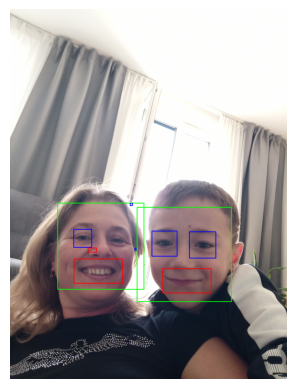

In [2]:
# Завантажуємо зображення
img = cv2.imread(r"C:\Users\OlhaIshchenko\Documents\Daten_Analyse\unterricht\projekt\20241025_projekt_gesichtserkennung\projekt_gesichtserkennung\content\i_Lev.jpg")

# Перетворюємо зображення в сірий формат
img_grau = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Завантажуємо каскадні класифікатори для облич, очей та усмішок
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

if face_cascade.empty() or eye_cascade.empty() or smile_cascade.empty():
    print("Fehler: Einer oder mehrere Klassifizierer nicht gefunden")
else:
    # Використовуємо класифікатор для пошуку облич на зображенні
    faces = face_cascade.detectMultiScale(img_grau, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Робимо копію зображення для малювання
    cop = img.copy()

    # Проходимо через знайдені обличчя і малюємо прямокутники
    for (x, y, w, h) in faces:
        cv2.rectangle(cop, (x, y), (x+w, y+h), (0, 255, 0), 10)

        # Вирізаємо область обличчя для подальшої обробки
        face_roi_color = cop[y:y+h, x:x+w]
        face_roi_gray = img_grau[y:y+h, x:x+w]
        # face_roi_gray = cv2.equalizeHist(face_roi_gray)

        # Розпізнавання очей всередині області обличчя
        higher_face_roi_gray = face_roi_gray[:int(2*h/3), :]
        higher_face_roi_color = face_roi_color[:int(2*h/3), :]

        eyes = eye_cascade.detectMultiScale(higher_face_roi_gray, scaleFactor=1.05, minNeighbors=3, minSize=(20, 20))
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(higher_face_roi_color, (ex, ey), (ex+ew, ey+eh), (255, 0, 0), 10)

        # Обмежуємо область пошуку нижньою частиною обличчя для усмішки
        lower_face_roi_gray = face_roi_gray[int(h/2):h, :]
        lower_face_roi_color = face_roi_color[int(h/2):h, :]

        # Розпізнавання усмішки
        smiles = smile_cascade.detectMultiScale(lower_face_roi_gray, scaleFactor=1.8, minNeighbors=10, minSize=(40, 40))
        for (sx, sy, sw, sh) in smiles:
            cv2.rectangle(lower_face_roi_color, (sx, sy), (sx+sw, sy+sh), (0, 0, 255), 10)

    # Відображаємо результат
    plt.imshow(cv2.cvtColor(cop, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


In [16]:
import os
os.getcwd()

'c:\\Users\\OlhaIshchenko\\Documents\\Daten_Analyse\\unterricht\\projekt\\20241025_projekt_gesichtserkennung\\projekt_gesichtserkennung'

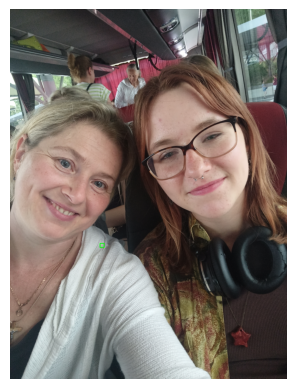

In [17]:
# Завантажуємо зображення
img = cv2.imread(r"C:\Users\OlhaIshchenko\Documents\Daten_Analyse\unterricht\projekt\20241025_projekt_gesichtserkennung\projekt_gesichtserkennung\content\i_tanya.jpg")

# Перетворюємо зображення в сірий формат
img_grau = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Завантажуємо каскадні класифікатори для облич, очей та усмішок
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')
eye_cascade = cv2.CascadeClassifier(r'.\content\haarcascade_eye_tree_eyeglasses.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

if face_cascade.empty() or eye_cascade.empty() or smile_cascade.empty():
    print("Fehler: Einer oder mehrere Klassifizierer nicht gefunden")
else:
    # Використовуємо класифікатор для пошуку облич на зображенні
    faces = face_cascade.detectMultiScale(img_grau, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Робимо копію зображення для малювання
    cop = img.copy()

    # Проходимо через знайдені обличчя і малюємо прямокутники
    for (x, y, w, h) in faces:
        cv2.rectangle(cop, (x, y), (x+w, y+h), (0, 255, 0), 10)

        # Вирізаємо область обличчя для подальшої обробки
        face_roi_color = cop[y:y+h, x:x+w]
        face_roi_gray = img_grau[y:y+h, x:x+w]
        # face_roi_gray = cv2.equalizeHist(face_roi_gray)

        # Розпізнавання очей всередині області обличчя
        higher_face_roi_gray = face_roi_gray[:int(2*h/3), :]
        higher_face_roi_color = face_roi_color[:int(2*h/3), :]

        eyes = eye_cascade.detectMultiScale(higher_face_roi_gray, scaleFactor=1.05, minNeighbors=3, minSize=(20, 20))
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(higher_face_roi_color, (ex, ey), (ex+ew, ey+eh), (255, 0, 0), 10)

        # Обмежуємо область пошуку нижньою частиною обличчя для усмішки
        lower_face_roi_gray = face_roi_gray[int(h/2):h, :]
        lower_face_roi_color = face_roi_color[int(h/2):h, :]

        # Розпізнавання усмішки
        smiles = smile_cascade.detectMultiScale(lower_face_roi_gray, scaleFactor=1.8, minNeighbors=10, minSize=(40, 40))
        for (sx, sy, sw, sh) in smiles:
            cv2.rectangle(lower_face_roi_color, (sx, sy), (sx+sw, sy+sh), (0, 0, 255), 10)

    # Відображаємо результат
    plt.imshow(cv2.cvtColor(cop, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
